In [1]:
!pip install wordcloud

In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
with open('/content/drive/My Drive/JaneEyre.txt', 'r') as file:
    text = file.read()

In [5]:
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='black',
    colormap='viridis',
    max_words=50,
    min_font_size=10,
)

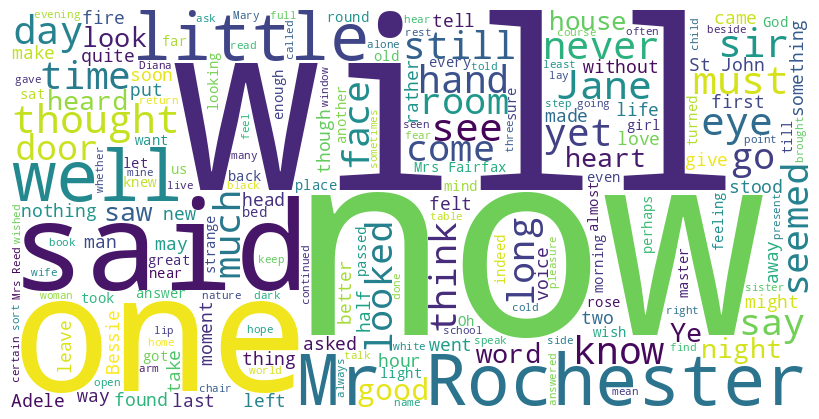

In [8]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=set(STOPWORDS),
    min_font_size=10,
).generate(text)

# Display basic word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

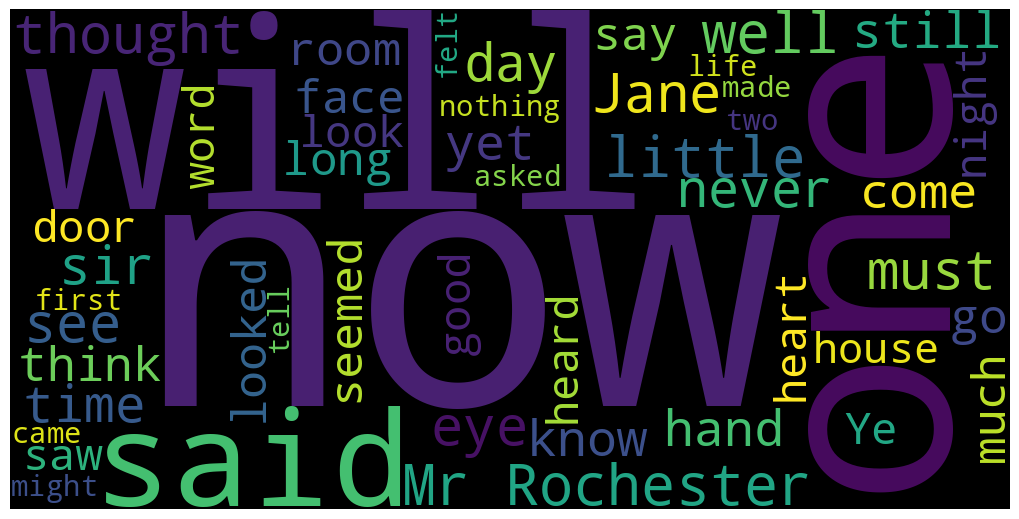

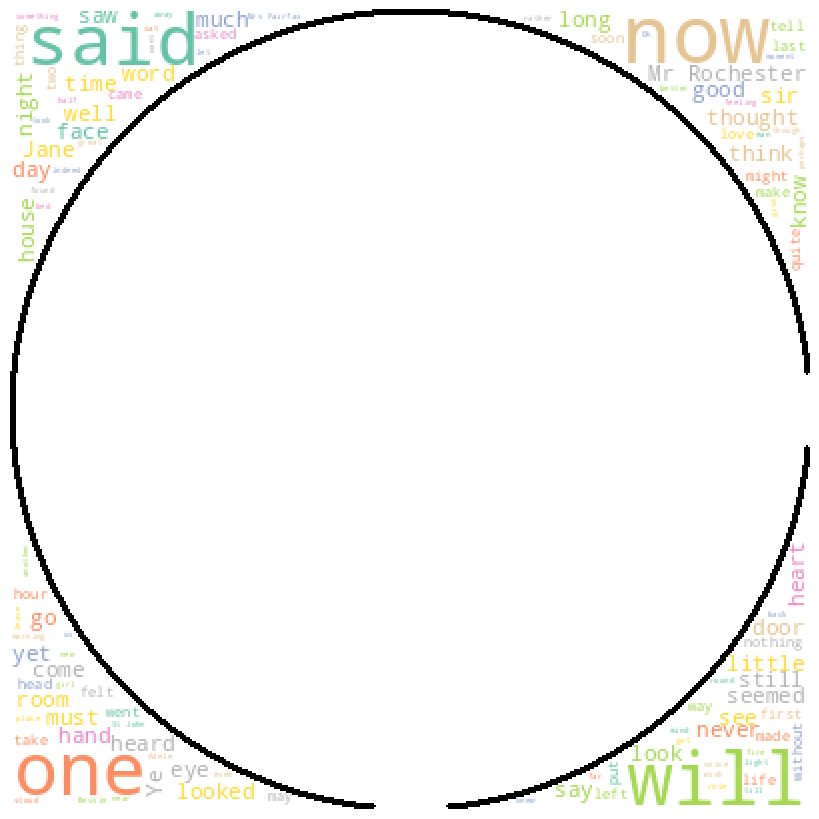

Creating heart-shaped word cloud...


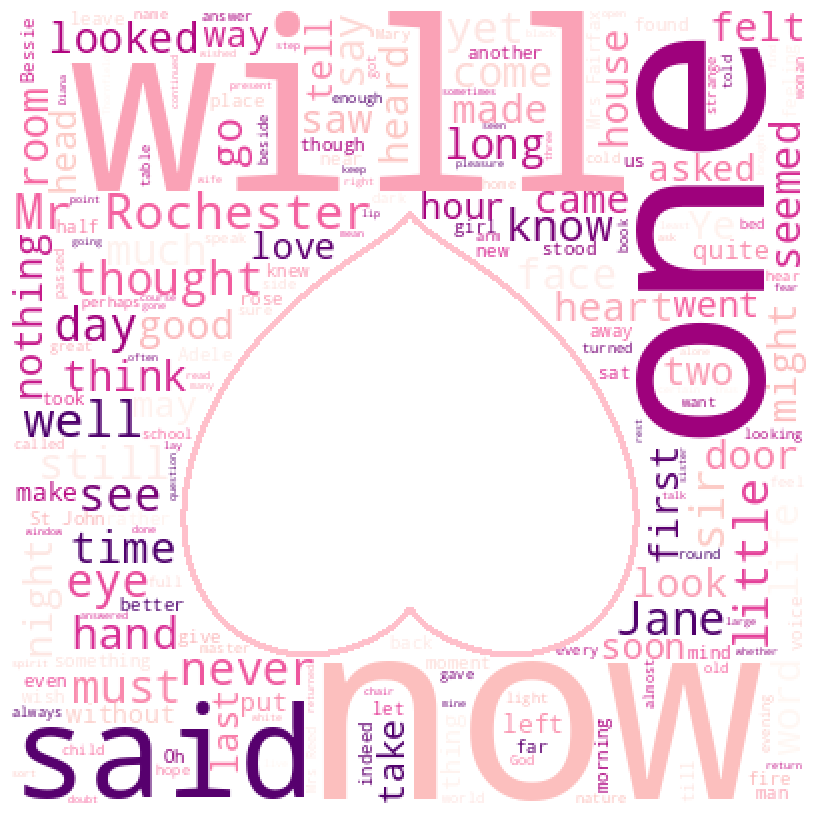

In [16]:
import numpy as np

custom_wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='black',
    stopwords=set(STOPWORDS),
    min_font_size=10,
    colormap='viridis',
    max_words=50,
    random_state=42
).generate(text)

# Display regular word cloud
plt.figure(figsize=(10, 5))
plt.imshow(custom_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Function to create circular mask
def create_circular_mask(h, w, center=None, radius=None):
    if center is None:
        center = (int(w/2), int(h/2))
    if radius is None:
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

# Create and process the mask
mask_array = create_circular_mask(400, 400)
# Convert boolean mask to integer
mask_array = np.array(mask_array, dtype=np.uint8)
# Scale to 0-255
mask_array = mask_array * 255

# Create word cloud with mask
masked_wordcloud = WordCloud(
    width=400,
    height=400,
    background_color='white',
    stopwords=set(STOPWORDS),
    mask=mask,
    colormap='Set2'
).generate(text)

# Create word cloud with mask
masked_wordcloud = WordCloud(
    width=400,
    height=400,
    background_color='white',
    stopwords=set(STOPWORDS),
    mask=mask_array,
    colormap='Set2',
    contour_width=3,
    contour_color='black'
).generate(text)

# Display masked word cloud
plt.figure(figsize=(8, 8))
plt.imshow(masked_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


def create_heart_mask(h, w):
    x = np.linspace(-2, 2, w)
    y = np.linspace(-2, 2, h)
    X, Y = np.meshgrid(x, y)

    # Heart formula
    heart = (X**2 + Y**2 - 1)**3 - (X**2 * Y**3) < 0
    return heart

# Create and display heart-shaped word cloud
print("Creating heart-shaped word cloud...")
heart_mask = create_heart_mask(400, 400)
heart_mask = np.array(heart_mask, dtype=np.uint8) * 255

heart_wordcloud = WordCloud(
    width=400,
    height=400,
    background_color='white',
    stopwords=set(STOPWORDS),
    mask=heart_mask,
    colormap='RdPu',
    contour_width=3,
    contour_color='pink'
).generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(heart_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
